     Sex Ratio cuisine_list  count
0          920      Afghani      1
1          920     American     25
2          920       Andhra      5
3          920      Arabian     27
4          920        Asian      9
..         ...          ...    ...
577        993       Sweets     10
578        993      Tandoor      3
579        993       Thalis      1
580        993      Tibetan      3
581        993       Waffle      2

[582 rows x 3 columns]
     Literacy Rate Total  cuisine_list  count
0                  60.56       Afghani      1
1                  60.56      American     18
2                  60.56        Andhra      3
3                  60.56       Arabian     24
4                  60.56         Asian      7
..                   ...           ...    ...
680                93.04       Punjabi      2
681                93.04        Snacks     20
682                93.04  South Indian     37
683                93.04        Sweets      4
684                93.04       Tandoor      1

[68

<Axes: title={'center': 'Cuisine Preference by Sex Ratio and Literacy Rate'}, xlabel='Sex Ratio,Literacy Rate Total'>

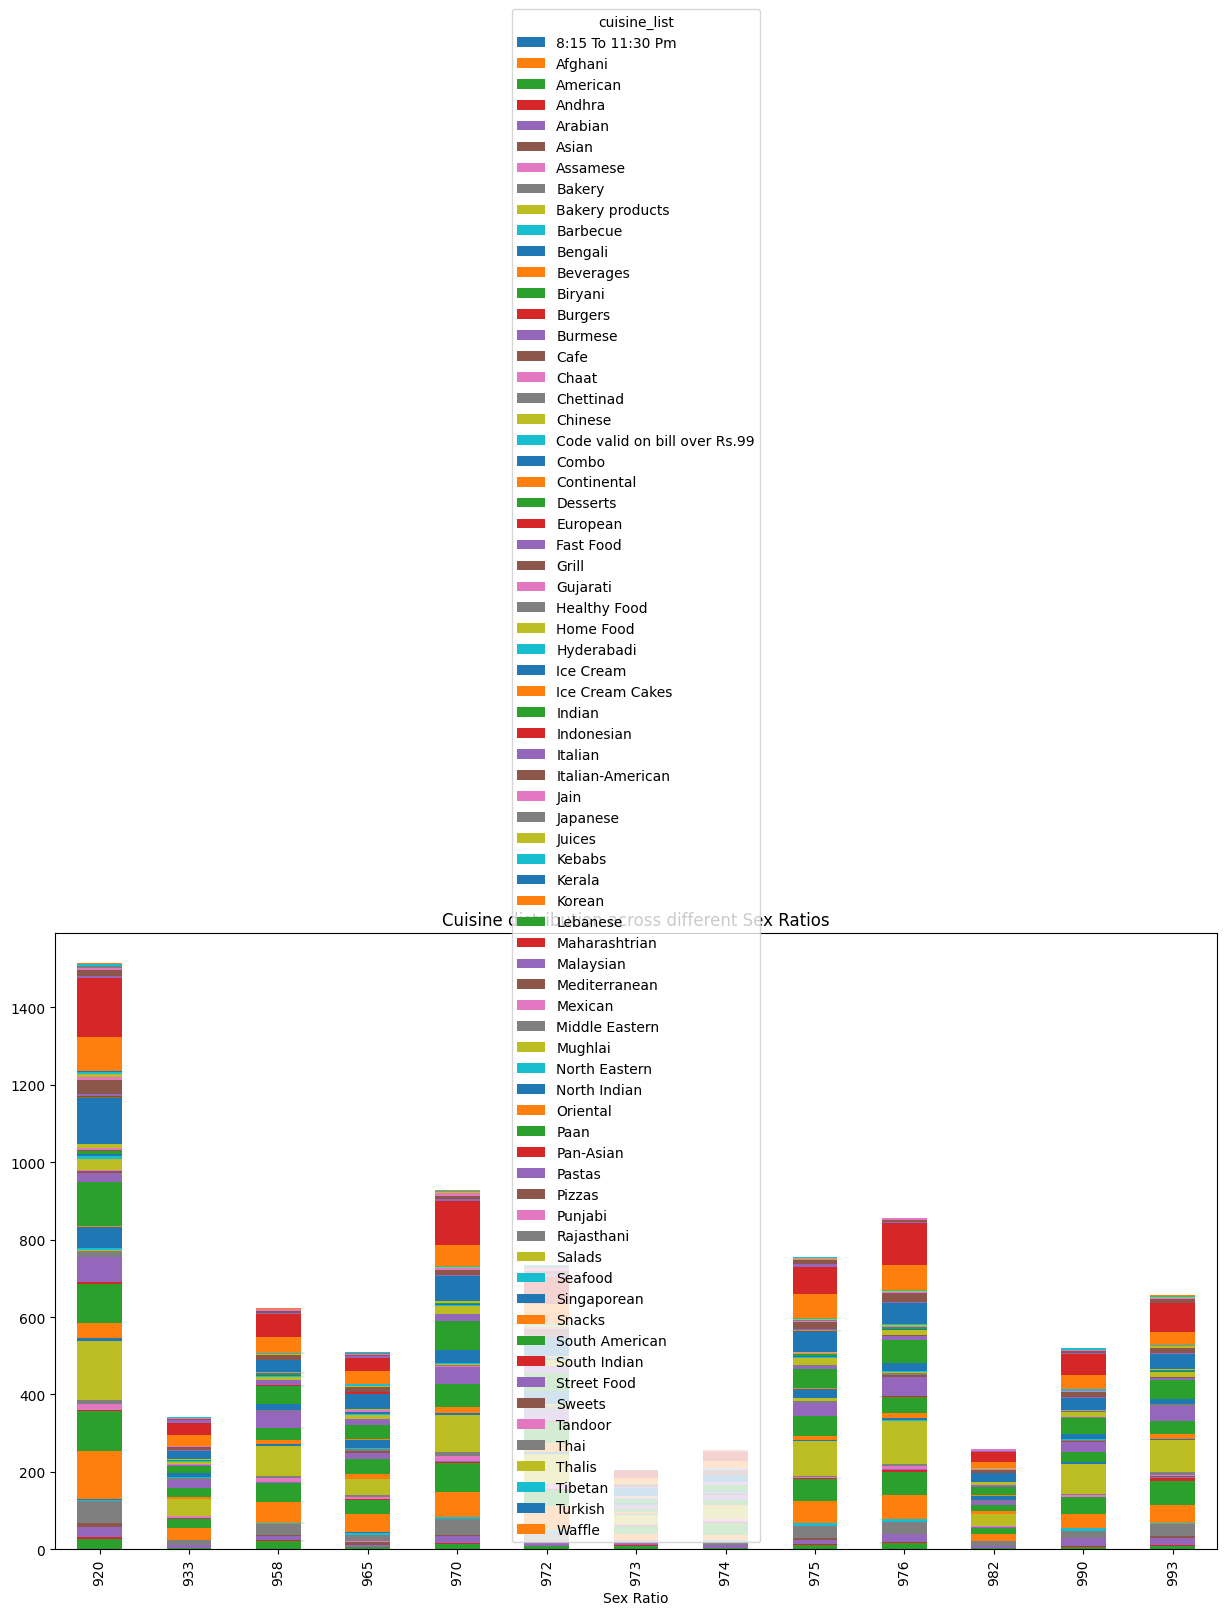

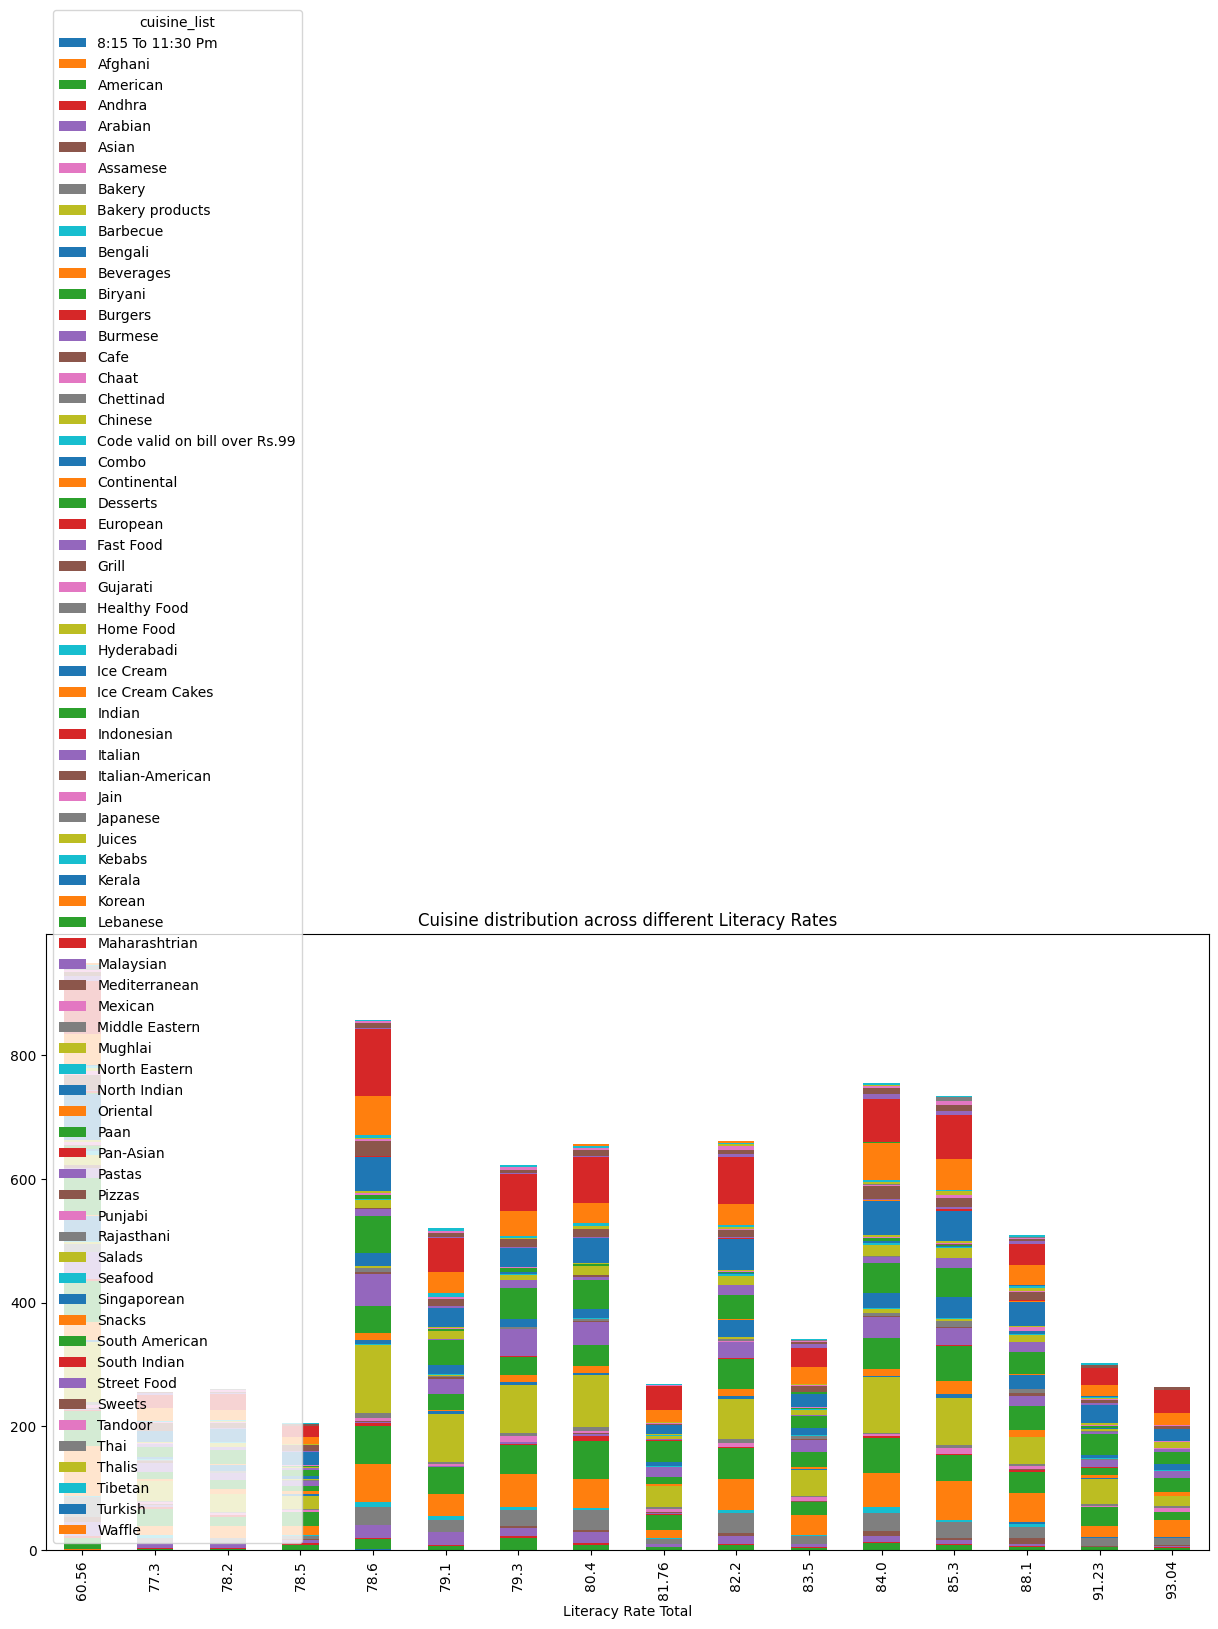

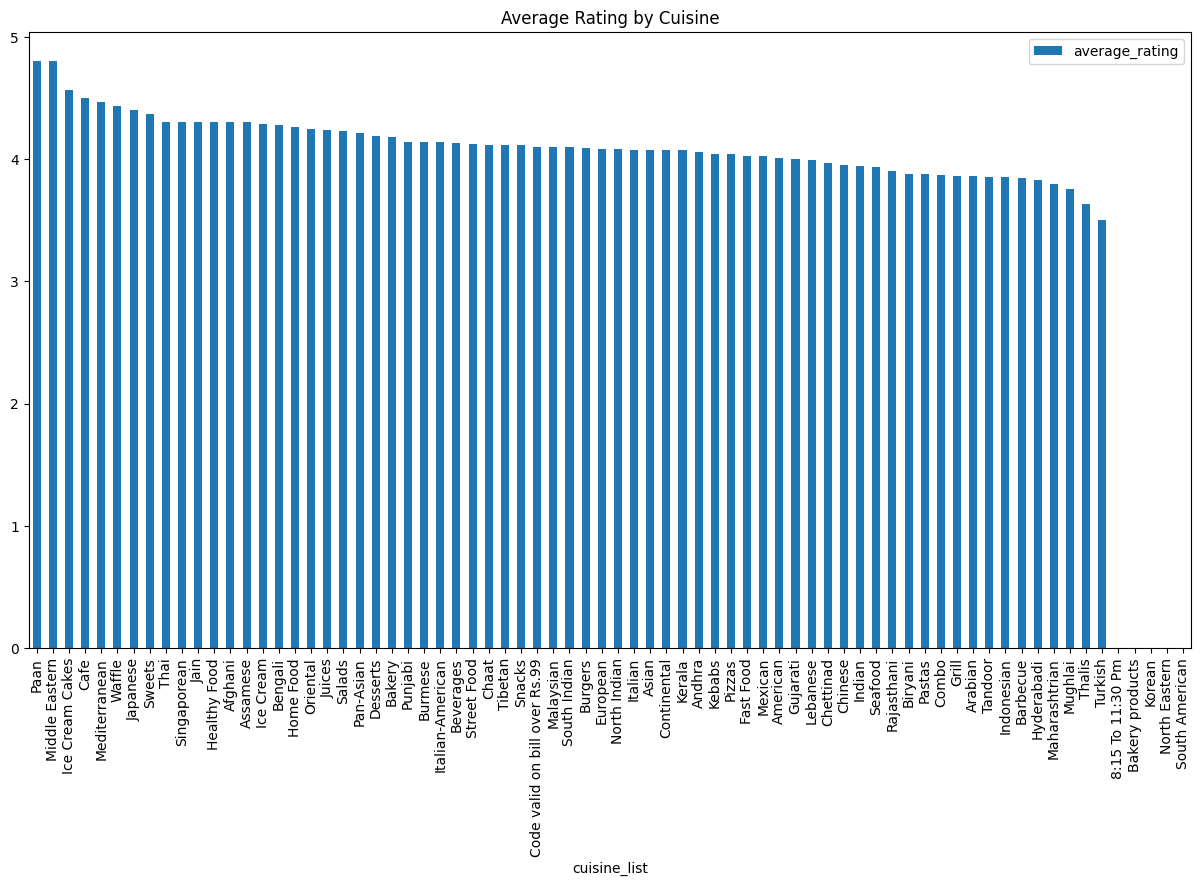

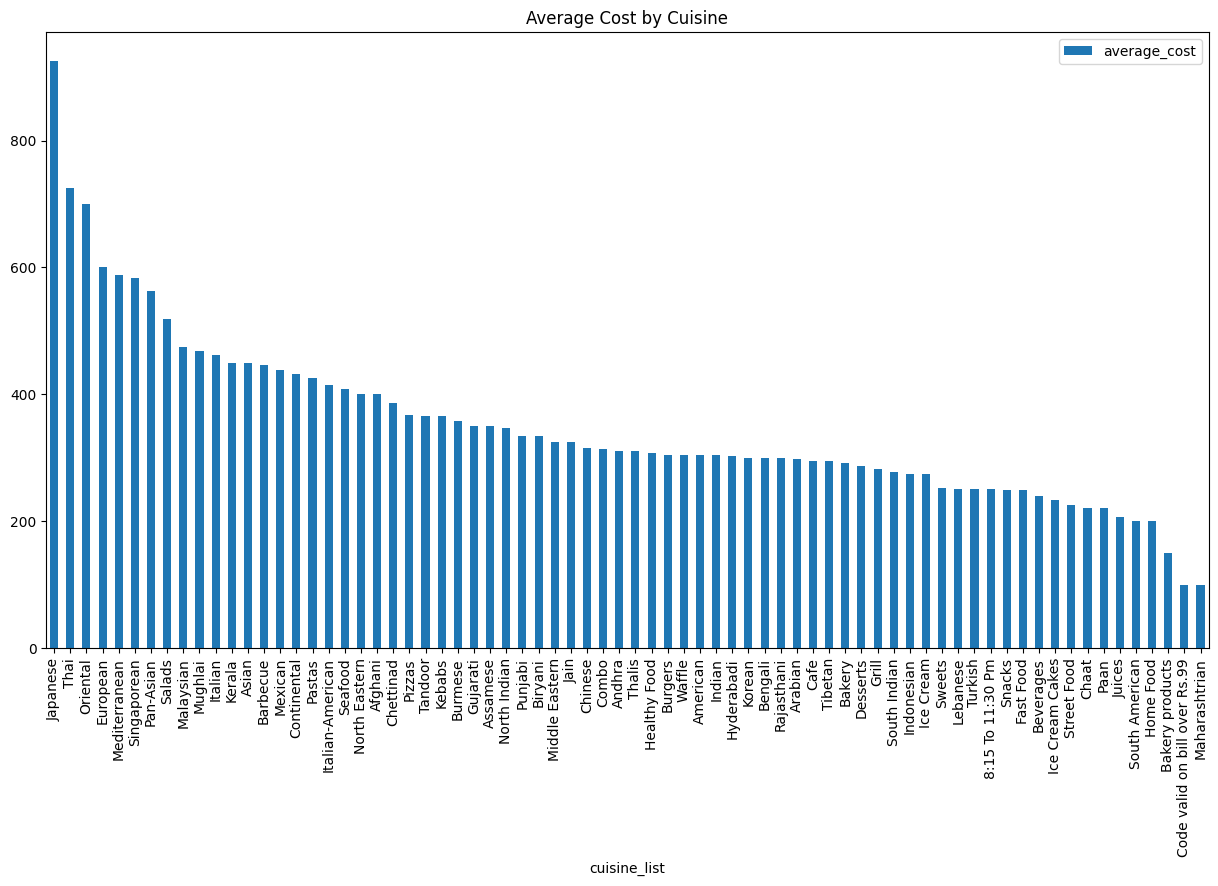

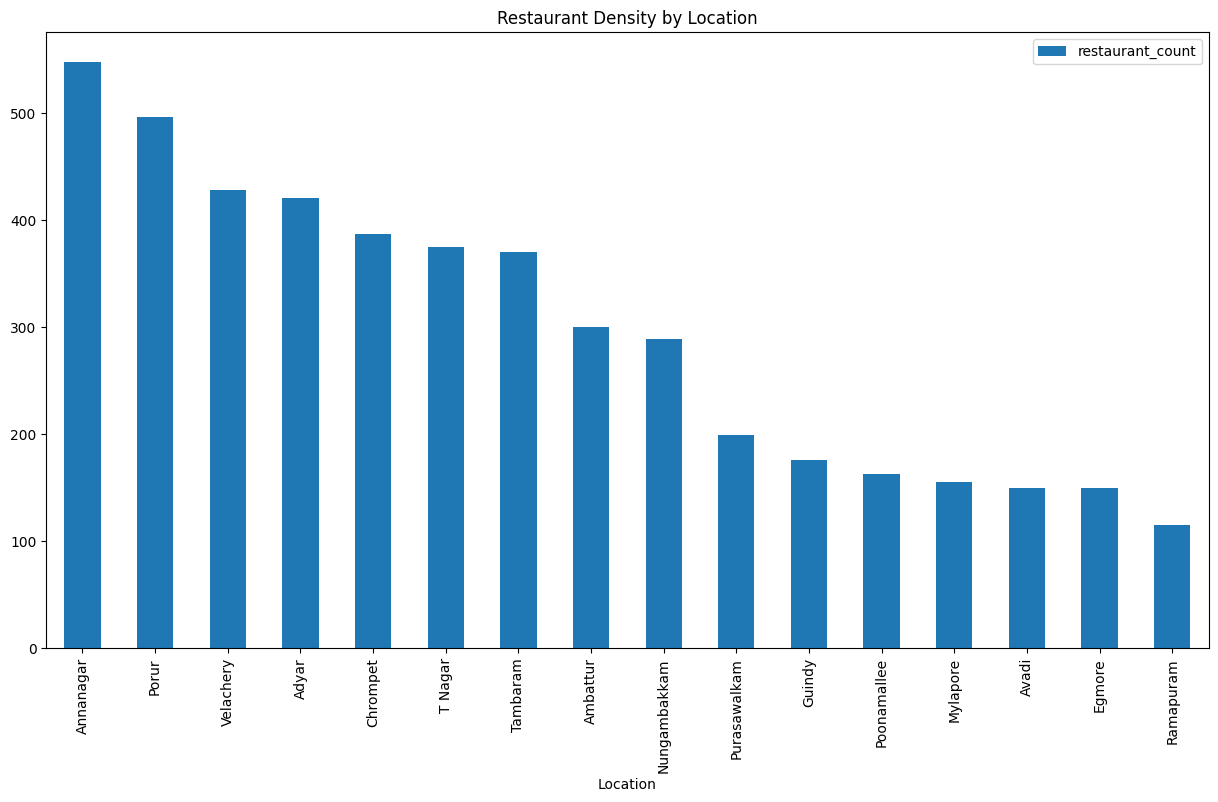

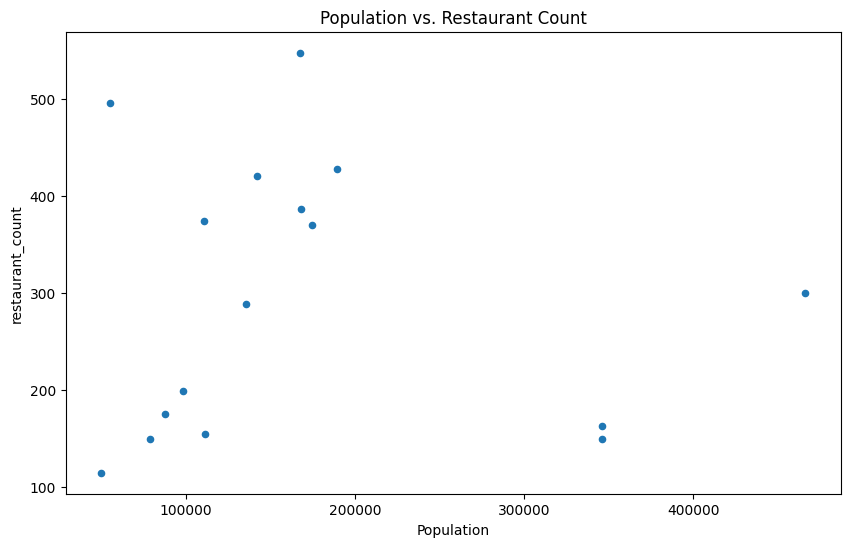

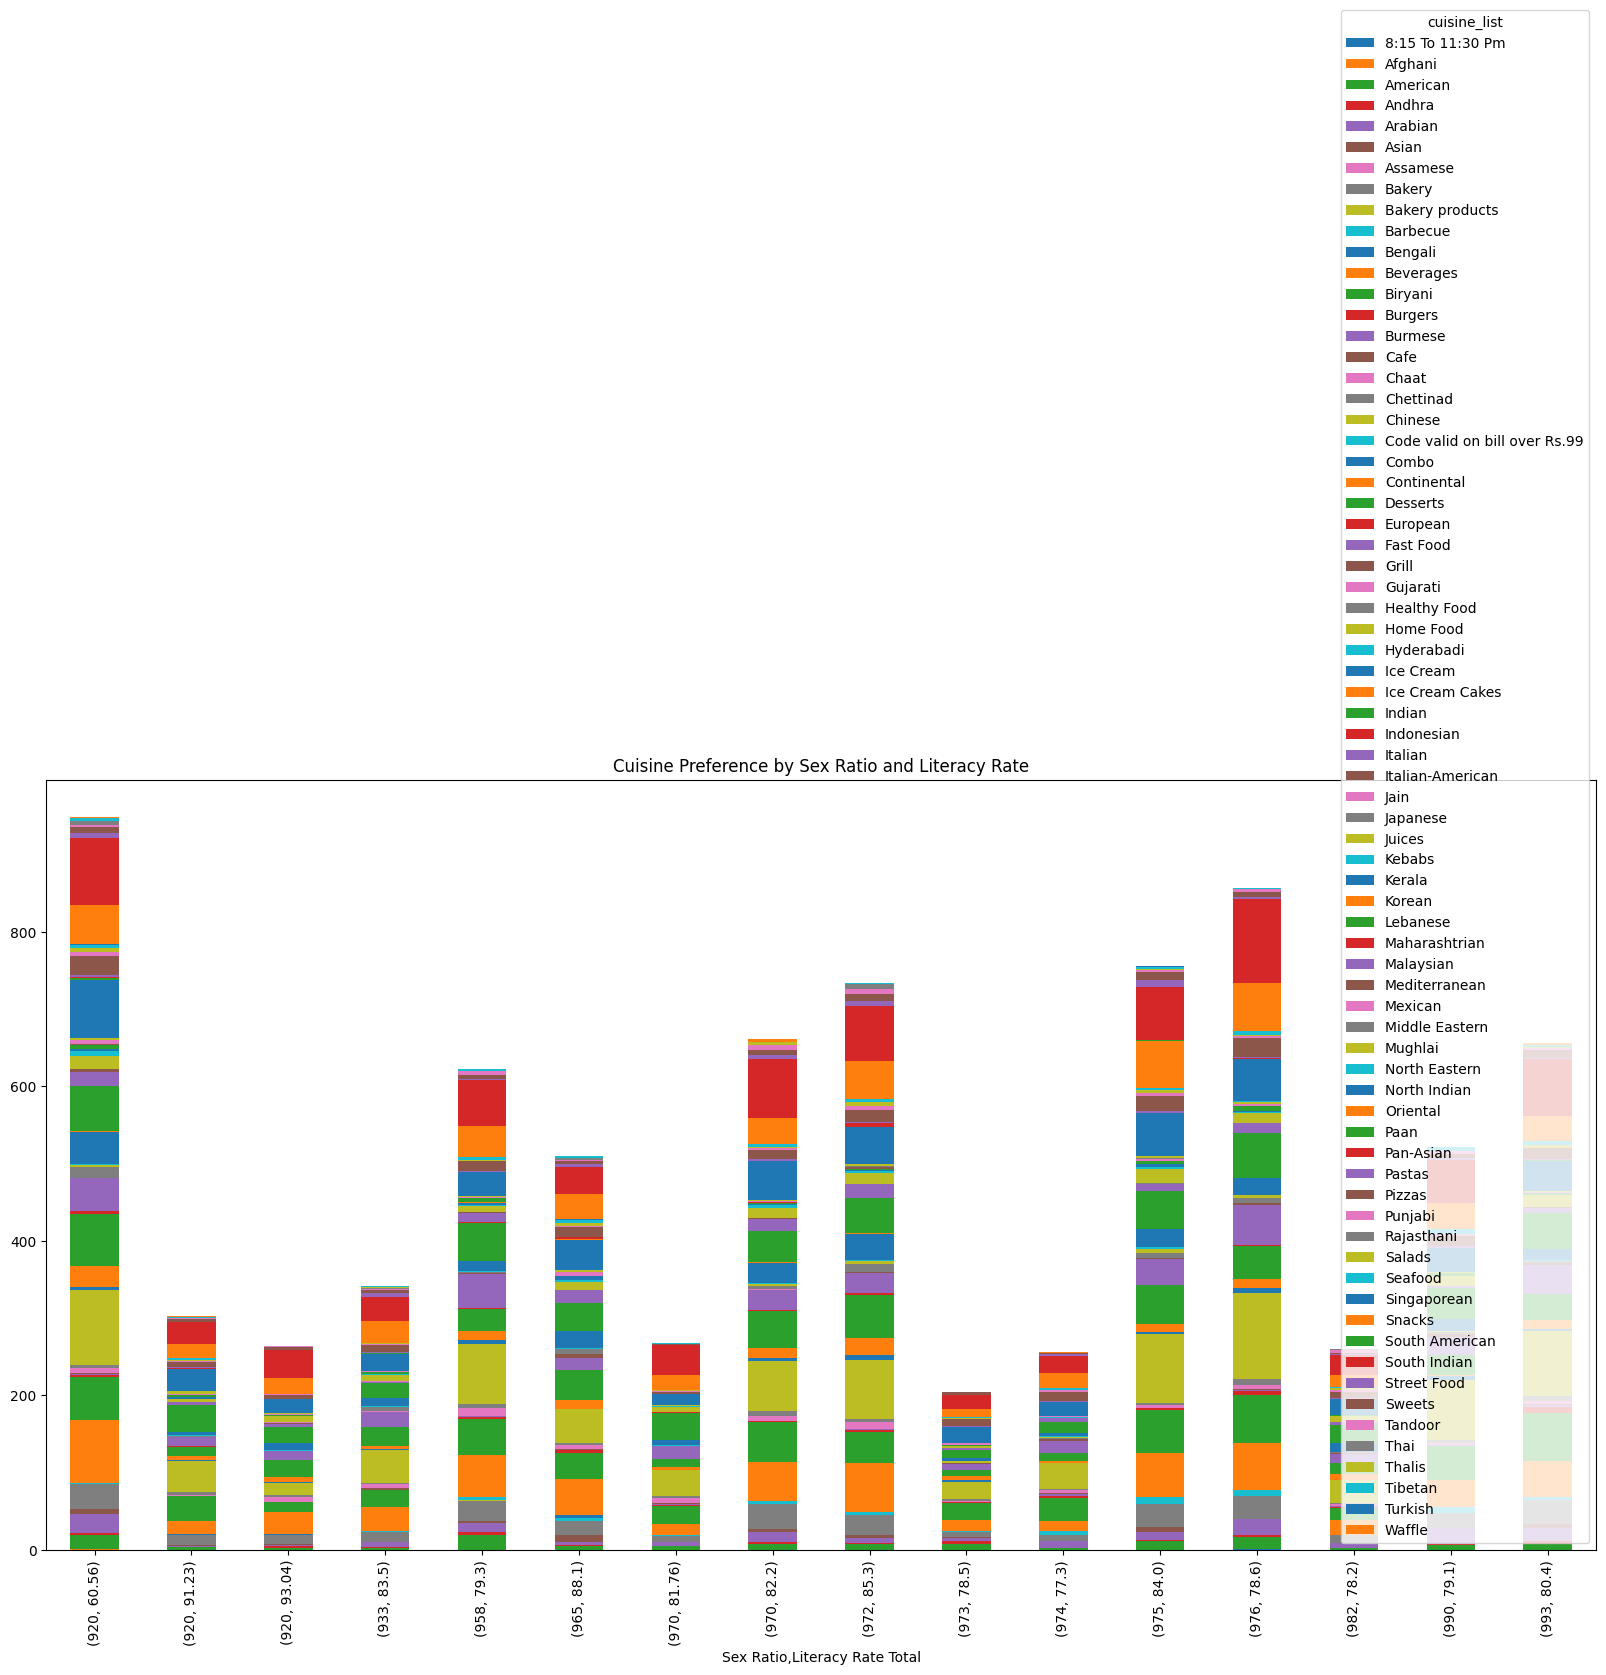

In [ ]:
import pandas as pd

# Load the dataset

data = pd.read_excel("merged_data.xlsx")
##data = data.head(100)


# Convert 'Literacy Rate Total' to numeric after removing '%' symbol
data['Literacy Rate Total'] = data['Literacy Rate Total'].str.replace('%', '').astype(float)

# Convert 'rating' to numeric, coercing non-numeric values to NaN
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Convert 'cost' to numeric, coercing errors if any non-numeric values are present
data['cost'] = pd.to_numeric(data['cost'], errors='coerce')

# Split the 'cuisine' column to handle each cuisine type separately
data['cuisine_list'] = data['cuisine'].str.split(',')

# Explode the cuisine list to make each cuisine type a separate row
exploded_data = data.explode('cuisine_list')

# Group by 'Sex Ratio' and 'cuisine_list' and get the count of each cuisine type per sex ratio
cuisine_impact = exploded_data.groupby(['Sex Ratio', 'cuisine_list']).size().reset_index(name='count')

# Display results
print(cuisine_impact)

# Visualization (optional)
pivot_table = cuisine_impact.pivot(index='Sex Ratio', columns='cuisine_list', values='count').fillna(0)
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 8), title='Cuisine distribution across different Sex Ratios')

# Group by Literacy Rate and Cuisine to see cuisine distribution across literacy rates
cuisine_literacy_impact = exploded_data.groupby(['Literacy Rate Total', 'cuisine_list']).size().reset_index(name='count')

# Display results
print(cuisine_literacy_impact)

# Visualization (optional)
pivot_table = cuisine_literacy_impact.pivot(index='Literacy Rate Total', columns='cuisine_list', values='count').fillna(0)
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 8), title='Cuisine distribution across different Literacy Rates')

# Average Rating by Cuisine
rating_cuisine = exploded_data.groupby('cuisine_list')['rating'].mean().reset_index(name='average_rating').sort_values(by='average_rating', ascending=False)
print(rating_cuisine)

# Visualization
rating_cuisine.plot(x='cuisine_list', y='average_rating', kind='bar', figsize=(15, 8), title='Average Rating by Cuisine')

# Cost Analysis by Cuisine Type
cuisine_cost = exploded_data.groupby('cuisine_list')['cost'].mean().reset_index(name='average_cost').sort_values(by='average_cost', ascending=False)
print(cuisine_cost)

# Visualization
cuisine_cost.plot(x='cuisine_list', y='average_cost', kind='bar', figsize=(15, 8), title='Average Cost by Cuisine')

# Restaurant Density by Location
location_density = data['Location'].value_counts().reset_index()
location_density.columns = ['Location', 'restaurant_count']
print(location_density)

# Visualization
location_density.plot(x='Location', y='restaurant_count', kind='bar', figsize=(15, 8), title='Restaurant Density by Location')

# Impact of Population on Restaurant Count
population_restaurant = data.groupby('Location').agg({'Population Total': 'first', 'name': 'count'}).reset_index()
population_restaurant.columns = ['Location', 'Population', 'restaurant_count']
print(population_restaurant)

# Visualization
population_restaurant.plot(x='Population', y='restaurant_count', kind='scatter', figsize=(10, 6), title='Population vs. Restaurant Count')

# Cuisine Popularity by Sex Ratio and Literacy Rate
combined_impact = exploded_data.groupby(['Sex Ratio', 'Literacy Rate Total', 'cuisine_list']).size().reset_index(name='count')
print(combined_impact)

# Visualization (optional)
pivot_table_combined = combined_impact.pivot_table(index=['Sex Ratio', 'Literacy Rate Total'], columns='cuisine_list', values='count', fill_value=0)
pivot_table_combined.plot(kind='bar', stacked=True, figsize=(20, 10), title='Cuisine Preference by Sex Ratio and Literacy Rate')

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
file_path = "merged_data.xlsx"
df = pd.read_excel(file_path)

# Data Cleaning
# Convert percentages to numeric
for col in ["Literacy Rate Total", "Literacy Rate Male", "Literacy Rate Female"]:
    df[col] = df[col].str.rstrip('%').astype(float)

# Handle missing or invalid ratings
df = df[df["rating"] != "--"]  # Remove rows with invalid ratings
df["rating"] = pd.to_numeric(df["rating"])  # Convert valid ratings to numeric

# Create a categorical target for ratings
df["Rating Category"] = pd.cut(df["rating"], bins=[0, 3.5, 4.5, 5], labels=["Low", "Medium", "High"])

# Define features and target
features = df[["Sex Ratio", "Literacy Rate Total", "Literacy Rate Male",
               "Literacy Rate Female", "Location", "cuisine"]]
target = df["Rating Category"]

# Preprocessing: Scale numeric features and encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["Sex Ratio", "Literacy Rate Total",
                                   "Literacy Rate Male", "Literacy Rate Female"]),
        ("cat", OneHotEncoder(handle_unknown='ignore'), ["Location", "cuisine"])
    ]
)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build pipeline with preprocessing and classifier
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])




# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Example Test Input with Known Categories
test_sample = pd.DataFrame({
    "Sex Ratio": [920],
    "Literacy Rate Total": [91.23],
    "Literacy Rate Male": [92.85],
    "Literacy Rate Female": [89.15],
    "Location": ["Guindy"],
    "cuisine": ["Chinese, Indian"]  # Ensure this is a category from the training data
})
test_sample_preprocessed = model.named_steps["preprocessor"].transform(test_sample)
test_prediction = model.named_steps["classifier"].predict(test_sample_preprocessed)

print("Test Sample Prediction:", test_prediction)

##Low: <3, Medium: 3-4, High: >4).

Confusion Matrix:
[[  3   0  34]
 [  0   3  40]
 [  8   8 376]]

Classification Report:
              precision    recall  f1-score   support

        High       0.27      0.08      0.12        37
         Low       0.27      0.07      0.11        43
      Medium       0.84      0.96      0.89       392

    accuracy                           0.81       472
   macro avg       0.46      0.37      0.38       472
weighted avg       0.74      0.81      0.76       472

Test Sample Prediction: ['Medium']


Prediction Model Interface

In [ ]:
import gradio as gr
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
file_path = "merged_data.xlsx"
df = pd.read_excel(file_path)

# Data Cleaning
# Convert percentages to numeric
for col in ["Literacy Rate Total", "Literacy Rate Male", "Literacy Rate Female"]:
    df[col] = df[col].str.rstrip('%').astype(float)

# Handle missing or invalid ratings
df = df[df["rating"] != "--"]  # Remove rows with invalid ratings
df["rating"] = pd.to_numeric(df["rating"])  # Convert valid ratings to numeric

# Create a categorical target for ratings
df["Rating Category"] = pd.cut(df["rating"], bins=[0, 3.5, 4.5, 5], labels=["Low", "Medium", "High"])

# Define features and target
features = df[["Sex Ratio", "Literacy Rate Total", "Literacy Rate Male",
               "Literacy Rate Female", "Location", "cuisine"]]
target = df["Rating Category"]

# Preprocessing: Scale numeric features and encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["Sex Ratio", "Literacy Rate Total",
                                   "Literacy Rate Male", "Literacy Rate Female"]),
        ("cat", OneHotEncoder(handle_unknown='ignore'), ["Location", "cuisine"])
    ]
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build pipeline with preprocessing and classifier
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Gradio function to predict rating category
def predict_rating_category(sex_ratio, literacy_rate_total, literacy_rate_male, literacy_rate_female, location, cuisine):
    # Create the input sample as a dataframe
    input_sample = pd.DataFrame({
        "Sex Ratio": [sex_ratio],
        "Literacy Rate Total": [literacy_rate_total],
        "Literacy Rate Male": [literacy_rate_male],
        "Literacy Rate Female": [literacy_rate_female],
        "Location": [location],
        "cuisine": [cuisine]
    })

    # Use the trained model to predict the rating category
    prediction = model.predict(input_sample)

    return prediction[0]

# Define Gradio interface
interface = gr.Interface(
    fn=predict_rating_category,
    inputs=[
        gr.Number(label="Sex Ratio"),
        gr.Number(label="Literacy Rate Total (%)"),
        gr.Number(label="Literacy Rate Male (%)"),
        gr.Number(label="Literacy Rate Female (%)"),
        gr.Textbox(label="Location"),
        gr.Textbox(label="Cuisine")
    ],
    outputs=gr.Textbox(label="Predicted Rating Category"),
    title="Restaurant Rating Prediction",
    description="Enter the demographic and restaurant details to predict the rating category (Low, Medium, High) of a restaurant."
)

# Launch the Gradio interface
interface.launch()


<ipython-input-5-6cc68a80e02e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rating"] = pd.to_numeric(df["rating"])  # Convert valid ratings to numeric
<ipython-input-5-6cc68a80e02e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rating Category"] = pd.cut(df["rating"], bins=[0, 3.5, 4.5, 5], labels=["Low", "Medium", "High"])


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3f8781e8612f37cb6a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Interface

In [ ]:
# Reload Swiggy dataset with the correct header row
res_data = pd.read_excel('res.xlsx', header=1)  # Specify header=1 to set the second row as header

# Check if column names are now correct
print("Updated Swiggy Data Columns:", res_data.columns)

# Rename columns for consistent formatting
#
res_data['cost'] = res_data['cost'].replace({'â‚¹': '', '₹': '', ',': ''}, regex=True).astype(float)



Updated Swiggy Data Columns: Index(['Id', 'name', 'rating', 'rating_count', 'cost', 'cuisine', 'Location'], dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
from geopy.geocoders import Nominatim

# Load the datasets
#res_data = pd.read_excel('res.xlsx')  # Your restaurant dataset
city_data = pd.read_excel('chennai_data1.xlsx')  # Your Chennai population dataset

# Clean restaurant data
res_data.columns = res_data.columns.str.lower().str.replace(' ', '_')
res_data['cost'] = res_data['cost'].replace({'â‚¹': '', '₹': '', ',': ''}, regex=True)
res_data['cost'] = pd.to_numeric(res_data['cost'], errors='coerce')
res_data['rating'] = pd.to_numeric(res_data['rating'].replace({'--': None}), errors='coerce')
res_data.dropna(subset=['id', 'name', 'rating', 'rating_count', 'cost', 'cuisine', 'location'], inplace=True)
res_data['location'] = res_data['location'].str.lower().str.strip()

# Clean city data
city_data.columns = city_data.columns.str.lower().str.replace(' ', '_')

# Function to geocode an area name to latitude and longitude
def get_coordinates(area_name):
    geolocator = Nominatim(user_agent="chennai_geocoder")
    location = geolocator.geocode(area_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Get coordinates for each area in the Chennai dataset
coordinates = city_data['name_of_city'].apply(get_coordinates)

# Add latitude and longitude to the city_data dataframe
city_data['latitude'], city_data['longitude'] = zip(*coordinates)

# List of columns to convert to numeric, including literacy rates
population_columns = [
    'population_total', 'population_male', 'population_female', 'population_0_6',
    'literates_total', 'literates_male', 'literates_female',
    'sex_ratio', 'effective_literacy_rate_total', 'effective_literacy_rate_male', 'effective_literacy_rate_female'
]

# Convert the columns to numeric, force errors to NaN and replace them with a default value if necessary
for col in population_columns:
    city_data[col] = pd.to_numeric(city_data[col], errors='coerce')

# Handle invalid literacy rate entries by filling with the mean literacy rate or None
mean_literacy_rate_total = city_data['effective_literacy_rate_total'].mean()
mean_literacy_rate_male = city_data['effective_literacy_rate_male'].mean()
mean_literacy_rate_female = city_data['effective_literacy_rate_female'].mean()

city_data['effective_literacy_rate_total'].fillna(mean_literacy_rate_total, inplace=True)
city_data['effective_literacy_rate_male'].fillna(mean_literacy_rate_male, inplace=True)
city_data['effective_literacy_rate_female'].fillna(mean_literacy_rate_female, inplace=True)

# Fill missing values for other population-related columns with 1 as a default
city_data.fillna(1, inplace=True)

# Ensure both datasets have the 'location' column in the same format (lowercase and stripped of extra spaces)
city_data['location'] = city_data['name_of_city'].str.lower().str.strip()

# Merge the datasets based on the 'location' column
combined_data = pd.merge(res_data, city_data, left_on='location', right_on='location', how='left')

# Function to get data for a specific area or coordinates
def get_area_info(area_name=None, latitude=None, longitude=None):
    if area_name:
        area_restaurants = combined_data[combined_data['location'].str.contains(area_name.lower(), case=False, na=False)]
    elif latitude is not None and longitude is not None:
        # Filter by proximity to given coordinates
        area_restaurants = combined_data[
            (combined_data['latitude'].round(3) == round(float(latitude), 3)) &
            (combined_data['longitude'].round(3) == round(float(longitude), 3))
        ]
        # Extract the area name from the data if coordinates match
        if not area_restaurants.empty:
            area_name = area_restaurants['location'].iloc[0]
    else:
        return "Please provide either an area name or valid latitude and longitude.", None, None, None, None

    if area_restaurants.empty:
        return "No data available for the specified area or coordinates.", None, None, None, None

    # Extract population and literacy rate data
    population_male = area_restaurants['population_male'].iloc[0]
    population_female = area_restaurants['population_female'].iloc[0]

    literacy_rate_male = area_restaurants['effective_literacy_rate_male'].iloc[0]
    literacy_rate_female = area_restaurants['effective_literacy_rate_female'].iloc[0]

    # Plot population distribution
    plt.figure(figsize=(5, 3))
    plt.bar(['Male', 'Female'], [population_male, population_female], color=['blue', 'pink'])
    plt.title("Population Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Population")
    plt.tight_layout()
    population_graph_path = "population_distribution.png"
    plt.savefig(population_graph_path)
    plt.close()

    # Plot literacy rate distribution
    plt.figure(figsize=(5, 3))
    plt.bar(['Male', 'Female'], [literacy_rate_male, literacy_rate_female], color=['blue', 'pink'])
    plt.title("Literacy Rate Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Literacy Rate (%)")
    plt.tight_layout()
    literacy_graph_path = "literacy_rate_distribution.png"
    plt.savefig(literacy_graph_path)
    plt.close()

    # Population, Literacy Rate, and Gender Ratio
    population = area_restaurants['population_total'].iloc[0]
    literacy_rate = area_restaurants['effective_literacy_rate_total'].iloc[0]
    gender_ratio = area_restaurants['sex_ratio'].iloc[0]

    # Top-rated Restaurants (ignoring zero ratings)
    top_rated_restaurants = area_restaurants[area_restaurants['rating'] > 0]
    top_rated_restaurants = top_rated_restaurants.sort_values(by='rating', ascending=False).head(3)
    top_rated_restaurants_info = top_rated_restaurants[['name', 'rating', 'cuisine']].to_string(index=False)

    # Popular Cuisines
    popular_cuisines = area_restaurants['cuisine'].value_counts().head(5).to_string()

    # Formatting the output
    area_info = f"""
    Area Information: {area_name.title()}

    Population: {population:,}

    Literacy Rate: {literacy_rate}%

    Sex Ratio: {gender_ratio}
    """
    return area_info, population_graph_path, literacy_graph_path, top_rated_restaurants_info, popular_cuisines

# Gradio Interface
interface = gr.Interface(
    fn=get_area_info,
    inputs=[
        gr.Textbox(label="Enter Area Name (or leave blank if using coordinates)", placeholder="e.g., Poonamallee"),
        gr.Number(label="Latitude (optional)", precision=5),
        gr.Number(label="Longitude (optional)", precision=5)
    ],
    outputs=[
        gr.Markdown(label="Area Information"),
        gr.Image(label="Population Distribution Graph"),
        gr.Image(label="Literacy Rate Distribution Graph"),
        gr.Textbox(label="Top 3 Rated Restaurants"),
        gr.Textbox(label="Popular Cuisines")
    ],
    title="Chennai Area & Restaurant Information",
    description="Enter an area name or coordinates to get detailed information about population, literacy rate, "
                "gender ratio, top-rated restaurants, and popular cuisines in Chennai, along with graphical distributions."
)

interface.launch()


<ipython-input-6-9d4bdc9406b6>:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  city_data['effective_literacy_rate_total'].fillna(mean_literacy_rate_total, inplace=True)
<ipython-input-6-9d4bdc9406b6>:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://42d25f48a5afb7404b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load dataset
file_path = "merged_data.xlsx"
df = pd.read_excel(file_path)

# Data Cleaning
for col in ["Literacy Rate Total", "Literacy Rate Male", "Literacy Rate Female"]:
    df[col] = df[col].str.rstrip('%').astype(float)

df = df[df["rating"] != "--"]
df["rating"] = pd.to_numeric(df["rating"])

# Create a categorical target for ratings
df["Rating Category"] = pd.cut(df["rating"], bins=[0, 3.5, 4.5, 5], labels=["Low", "Medium", "High"])

# Define features and target
features = df[["Sex Ratio", "Literacy Rate Total", "Literacy Rate Male",
               "Literacy Rate Female", "Location", "cuisine"]]
target = df["Rating Category"]

# Preprocessing
# One-hot encode categorical features and normalize numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["Sex Ratio", "Literacy Rate Total",
                                   "Literacy Rate Male", "Literacy Rate Female"]),
        ("cat", OneHotEncoder(handle_unknown='ignore'), ["Location", "cuisine"])
    ]
)

X = preprocessor.fit_transform(features)
y = pd.get_dummies(target).values  # Convert target to one-hot encoding

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 categories: Low, Medium, High
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
#medium
# Predict on new data
#test_sample = pd.DataFrame({
    #"Sex Ratio": [920],
    #"Literacy Rate Total": [91.23],
    #"Literacy Rate Male": [92.85],
   # "Literacy Rate Female": [89.15],
  #  "Location": ["Guindy"],
 #   "cuisine": ["Chinese, Indian"]
#})
#test_sample_preprocessed = preprocessor.transform(test_sample)
#prediction = model.predict(test_sample_preprocessed)
#predicted_category = np.argmax(prediction, axis=1)

#low
test_sample = pd.DataFrame({
    "Sex Ratio": [933],
    "Literacy Rate Total": [91.76],
    "Literacy Rate Male": [85.23],
    "Literacy Rate Female": [88.18],
    "Location": ["Purasawalkam"],
    "cuisine": ["Thalis"]
})
test_sample_preprocessed = preprocessor.transform(test_sample)
prediction = model.predict(test_sample_preprocessed)
predicted_category = np.argmax(prediction, axis=1)

#high
#test_sample = pd.DataFrame({
#    "Sex Ratio": [920],
#    "Literacy Rate Total": [60.56],
#    "Literacy Rate Male": [65.49],
#    "Literacy Rate Female": [55.51],
#    "Location": ["Annanagar"],
#    "cuisine": ["Healthy Food"]
#})
#test_sample_preprocessed = preprocessor.transform(test_sample)
#prediction = model.predict(test_sample_preprocessed)
#predicted_category = np.argmax(prediction, axis=1)

# Map predicted category index to the label
categories = ["Low", "Medium", "High"]
print("Test Sample Prediction:", categories[predicted_category[0]])


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6624 - loss: 0.9414 - val_accuracy: 0.8413 - val_loss: 0.5723
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8377 - loss: 0.5553 - val_accuracy: 0.8413 - val_loss: 0.5577
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8437 - loss: 0.5140 - val_accuracy: 0.8413 - val_loss: 0.5502
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8471 - loss: 0.4831 - val_accuracy: 0.8413 - val_loss: 0.5515
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8500 - loss: 0.4616 - val_accuracy: 0.8413 - val_loss: 0.5537
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8410 - loss: 0.4631 - val_accuracy: 0.8413 - val_loss: 0.5605
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8507 - loss: 0.4205 - val_accuracy: 0.8360 - val_loss: 0.5731
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8472 - loss: 0.4151 - val_accuracy: 0.8360 - val_loss: 0.5754
Epo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set random seed for reproducibility
np.random.seed(42)

# Load dataset
file_path = "merged_data.xlsx"
df = pd.read_excel(file_path)

# Data Cleaning
for col in ["Literacy Rate Total", "Literacy Rate Male", "Literacy Rate Female"]:
    df[col] = df[col].str.rstrip('%').astype(float)

df = df[df["rating"] != "--"]
df["rating"] = pd.to_numeric(df["rating"])

# Create a categorical target for ratings
df["Rating Category"] = pd.cut(df["rating"], bins=[0, 3.5, 4.5, 5], labels=["Low", "Medium", "High"])

# Generate Synthetic Data for Low and High Ratings
def generate_synthetic_data(category, num_samples):
    if category == "Low":
        return pd.DataFrame({
            "Sex Ratio": np.random.uniform(900, 940, num_samples),
            "Literacy Rate Total": np.random.uniform(50, 70, num_samples),
            "Literacy Rate Male": np.random.uniform(55, 75, num_samples),
            "Literacy Rate Female": np.random.uniform(45, 65, num_samples),
            "Location": np.random.choice(["Annanagar", "Teynampet", "Guindy"], num_samples),
            "cuisine": np.random.choice(["Fast Food", "Street Food", "Snacks"], num_samples),
            "Rating Category": ["Low"] * num_samples
        })
    elif category == "High":
        return pd.DataFrame({
            "Sex Ratio": np.random.uniform(920, 960, num_samples),
            "Literacy Rate Total": np.random.uniform(85, 100, num_samples),
            "Literacy Rate Male": np.random.uniform(90, 100, num_samples),
            "Literacy Rate Female": np.random.uniform(80, 95, num_samples),
            "Location": np.random.choice(["Adyar", "Besant Nagar", "Thiruvanmiyur"], num_samples),
            "cuisine": np.random.choice(["Healthy Food", "Organic", "Gourmet"], num_samples),
            "Rating Category": ["High"] * num_samples
        })

# Generate and combine synthetic data
low_data = generate_synthetic_data("Low", 500)
high_data = generate_synthetic_data("High", 500)
synthetic_df = pd.concat([low_data, high_data], ignore_index=True)

# Combine synthetic data with the original dataset
full_dataset = pd.concat([df, synthetic_df], ignore_index=True)

# Preprocessing
features = full_dataset[["Sex Ratio", "Literacy Rate Total", "Literacy Rate Male",
                         "Literacy Rate Female", "Location", "cuisine"]]
target = full_dataset["Rating Category"]

# Normalize numeric data and one-hot encode categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["Sex Ratio", "Literacy Rate Total",
                                   "Literacy Rate Male", "Literacy Rate Female"]),
        ("cat", OneHotEncoder(handle_unknown='ignore'), ["Location", "cuisine"])
    ]
)

X = preprocessor.fit_transform(features)
y = pd.get_dummies(target).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define an improved FNN model with Dropout
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% dropout rate
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Output layer for 3 categories: Low, Medium, High
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Example Prediction
test_sample = pd.DataFrame({
    "Sex Ratio": [920],
    "Literacy Rate Total": [91.23],
    "Literacy Rate Male": [92.85],
    "Literacy Rate Female": [89.15],
    "Location": ["Annanagar"],
    "cuisine": ["Chinese, Indian"]
})

test_sample_preprocessed = preprocessor.transform(test_sample)
prediction = model.predict(test_sample_preprocessed)
predicted_category = np.argmax(prediction, axis=1)

# Map predicted category index to the label
categories = ["Low", "Medium", "High"]
print("Test Sample Prediction:", categories[predicted_category[0]])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6188 - loss: 0.9341 - val_accuracy: 0.8178 - val_loss: 0.5308
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8592 - loss: 0.4864 - val_accuracy: 0.8810 - val_loss: 0.4292
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8711 - loss: 0.4155 - val_accuracy: 0.8773 - val_loss: 0.4210
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9003 - loss: 0.3336 - val_accuracy: 0.8736 - val_loss: 0.4200
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8722 - loss: 0.3553 - val_accuracy: 0.8699 - val_loss: 0.4243
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9017 - loss: 0.2998 - val_accuracy: 0.8662 - val_loss: 0.4290
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9028 - loss: 0.2800 - val_accuracy: 0.8550 - val_loss: 0.4327
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9041 - loss: 0.2666 - val_accuracy: 0.8587 - v

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load dataset
file_path = "merged_data.xlsx"
df = pd.read_excel(file_path)

# Data Cleaning
for col in ["Literacy Rate Total", "Literacy Rate Male", "Literacy Rate Female"]:
    df[col] = df[col].str.rstrip('%').astype(float)

df = df[df["rating"] != "--"]
df["rating"] = pd.to_numeric(df["rating"])

# Define features and target
features = df[["Sex Ratio", "Literacy Rate Total", "Literacy Rate Male",
               "Literacy Rate Female", "Location", "cuisine"]]
target = df["rating"]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["Sex Ratio", "Literacy Rate Total",
                                   "Literacy Rate Male", "Literacy Rate Female"]),
        ("cat", OneHotEncoder(handle_unknown='ignore'), ["Location", "cuisine"])
    ]
)

X = preprocessor.fit_transform(features)
y = target.values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the regression model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',  # Use MSE for regression
              metrics=['mean_absolute_error'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (MSE): {loss}")
print(f"Test Mean Absolute Error (MAE): {mae}")

# Predict on a sample input
#test_sample = pd.DataFrame({
#    "Sex Ratio": [920],
#    "Literacy Rate Total": [91.23],
#    "Literacy Rate Male": [92.85],
#    "Literacy Rate Female": [89.15],
#    "Location": ["Guindy"],
#    "cuisine": ["Chinese, Indian"]
#})

test_sample = pd.DataFrame({
    "Sex Ratio": [958],
    "Literacy Rate Total": [79.3],
    "Literacy Rate Male": [81.2],
    "Literacy Rate Female": [77.1],
    "Location": ["Tambaram"],
    "cuisine": ["Arabian"]
})

test_sample_preprocessed = preprocessor.transform(test_sample)
prediction = model.predict(test_sample_preprocessed)
print(f"Predicted Rating: {prediction[0][0]:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 12.8159 - mean_absolute_error: 3.5087 - val_loss: 1.6227 - val_mean_absolute_error: 1.0984
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7761 - mean_absolute_error: 0.7036 - val_loss: 0.3139 - val_mean_absolute_error: 0.4349
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1847 - mean_absolute_error: 0.3288 - val_loss: 0.2156 - val_mean_absolute_error: 0.3475
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1393 - mean_absolute_error: 0.2758 - val_loss: 0.1958 - val_mean_absolute_error: 0.3220
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1362 - mean_absolute_error: 0.2600 - val_loss: 0.1928 - val_mean_absolute_error: 0.3250
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1111 - mean_absolute_error: 0.2369 - val_loss: 0.1923 - val_mean_absolute_error: 0.3260
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0964 - mean_absolute_error: 0.2233 - val_loss: 0.1

Models- XGBoost, SVM , Ensemble


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Load dataset
file_path = "merged_data.xlsx"
df = pd.read_excel(file_path)

# Data Cleaning
# Convert percentages to numeric
for col in ["Literacy Rate Total", "Literacy Rate Male", "Literacy Rate Female"]:
    df[col] = df[col].str.rstrip('%').astype(float)

# Handle missing or invalid ratings
df = df[df["rating"] != "--"]  # Remove rows with invalid ratings
df["rating"] = pd.to_numeric(df["rating"])  # Convert valid ratings to numeric

# Create a categorical target for ratings
df["Rating Category"] = pd.cut(df["rating"], bins=[0, 3.5, 4.5, 5], labels=["Low", "Medium", "High"])

# Encode target labels as numeric values
label_encoder = LabelEncoder()
df["Rating Category Encoded"] = label_encoder.fit_transform(df["Rating Category"])

# Define features and target
features = df[["Sex Ratio", "Literacy Rate Total", "Literacy Rate Male",
               "Literacy Rate Female", "Location", "cuisine"]]
target = df["Rating Category Encoded"]

# Preprocessing: Scale numeric features and encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["Sex Ratio", "Literacy Rate Total",
                                   "Literacy Rate Male", "Literacy Rate Female"]),
        ("cat", OneHotEncoder(handle_unknown='ignore'), ["Location", "cuisine"])
    ]
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define individual models
svm_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel='linear', probability=True, random_state=42))
])

xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42))
])

# Ensemble: Combine SVM and XGBoost
ensemble_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", VotingClassifier(estimators=[
        ('svm', SVC(kernel='linear', probability=True, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))  # Random Forest added
    ], voting='soft'))  # 'soft' voting averages probabilities
])


# Train and Evaluate SVM
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred, target_names=label_encoder.classes_))

# Train and Evaluate XGBoost
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_pred, target_names=label_encoder.classes_))

# Train and Evaluate Ensemble Model
ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
print("\nEnsemble Model Classification Report:")
print(classification_report(y_test, ensemble_pred, target_names=label_encoder.classes_))

# Example Test Input with Known Categories
test_sample = pd.DataFrame({
    "Sex Ratio": [920],
    "Literacy Rate Total": [91.23],
    "Literacy Rate Male": [92.85],
    "Literacy Rate Female": [89.15],
    "Location": ["Guindy"],
    "cuisine": ["Chinese, Indian"]  # Ensure this is a category from the training data
})
test_prediction = ensemble_model.predict(test_sample)
print("\nTest Sample Prediction (Ensemble):", label_encoder.inverse_transform(test_prediction))


SVM Classification Report:
              precision    recall  f1-score   support

        High       0.33      0.05      0.09        37
         Low       0.43      0.07      0.12        43
      Medium       0.84      0.98      0.90       392

    accuracy                           0.83       472
   macro avg       0.53      0.37      0.37       472
weighted avg       0.76      0.83      0.77       472


XGBoost Classification Report:
              precision    recall  f1-score   support

        High       0.50      0.03      0.05        37
         Low       0.00      0.00      0.00        43
      Medium       0.83      0.99      0.90       392

    accuracy                           0.82       472
   macro avg       0.44      0.34      0.32       472
weighted avg       0.73      0.82      0.75       472


Ensemble Model Classification Report:
              precision    recall  f1-score   support

        High       0.50      0.03      0.05        37
         Low       0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
file_path = "merged_data.xlsx"
df = pd.read_excel(file_path)

# Data Cleaning
# Convert percentages to numeric
for col in ["Literacy Rate Total", "Literacy Rate Male", "Literacy Rate Female"]:
    df[col] = df[col].str.rstrip('%').astype(float)

# Handle missing or invalid ratings
df = df[df["rating"] != "--"]  # Remove rows with invalid ratings
df["rating"] = pd.to_numeric(df["rating"])  # Convert valid ratings to numeric

# Create a categorical target for ratings
df["Rating Category"] = pd.cut(df["rating"], bins=[0, 3.5, 4.5, 5], labels=["Low", "Medium", "High"])

# Define features and target
features = df[["Sex Ratio", "Literacy Rate Total", "Literacy Rate Male",
               "Literacy Rate Female", "Location", "cuisine"]]
target = df["Rating Category"]

# Preprocessing: Scale numeric features and encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["Sex Ratio", "Literacy Rate Total",
                                   "Literacy Rate Male", "Literacy Rate Female"]),
        ("cat", OneHotEncoder(handle_unknown='ignore'), ["Location", "cuisine"])
    ]
)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build pipeline with preprocessing and classifier
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])




# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(" ")

print("RandomForest Report:")
print(classification_report(y_test, y_pred))


# Example Test Input with Known Categories
test_sample = pd.DataFrame({
    "Sex Ratio": [920],
    "Literacy Rate Total": [91.23],
    "Literacy Rate Male": [92.85],
    "Literacy Rate Female": [89.15],
    "Location": ["Guindy"],
    "cuisine": ["Chinese, Indian"]  # Ensure this is a category from the training data
})
test_sample_preprocessed = model.named_steps["preprocessor"].transform(test_sample)
test_prediction = model.named_steps["classifier"].predict(test_sample_preprocessed)

print("Test Sample Prediction:", test_prediction)

##Low: <3, Medium: 3-4, High: >4).

Confusion Matrix:
[[  3   0  34]
 [  0   3  40]
 [  8   8 376]]
 
RandomForest Report:
              precision    recall  f1-score   support

        High       0.27      0.08      0.12        37
         Low       0.27      0.07      0.11        43
      Medium       0.84      0.96      0.89       392

    accuracy                           0.81       472
   macro avg       0.46      0.37      0.38       472
weighted avg       0.74      0.81      0.76       472

Test Sample Prediction: ['Medium']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
file_path = "merged_data.xlsx"
df = pd.read_excel(file_path)

# Data Cleaning
# Convert percentages to numeric
for col in ["Literacy Rate Total", "Literacy Rate Male", "Literacy Rate Female"]:
    df[col] = df[col].str.rstrip('%').astype(float)

# Handle missing or invalid ratings
df = df[df["rating"] != "--"]  # Remove rows with invalid ratings
df["rating"] = pd.to_numeric(df["rating"])  # Convert valid ratings to numeric

# Create a categorical target for ratings
df["Rating Category"] = pd.cut(df["rating"], bins=[0, 3.5, 4.5, 5], labels=["Low", "Medium", "High"])

# Define features and target
features = df[["Sex Ratio", "Literacy Rate Total", "Literacy Rate Male",
               "Literacy Rate Female", "Location", "cuisine"]]
target = df["Rating Category"]

# Preprocessing: Scale numeric features and encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["Sex Ratio", "Literacy Rate Total",
                                   "Literacy Rate Male", "Literacy Rate Female"]),
        ("cat", OneHotEncoder(handle_unknown='ignore'), ["Location", "cuisine"])
    ]
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build pipeline with preprocessing and SVC classifier
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel='linear', probability=False, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Example Test Input with Known Categories
test_sample = pd.DataFrame({
    "Sex Ratio": [920],
    "Literacy Rate Total": [91.23],
    "Literacy Rate Male": [92.85],
    "Literacy Rate Female": [89.15],
    "Location": ["Guindy"],
    "cuisine": ["Chinese, Indian"]  # Ensure this is a category from the training data
})
test_sample_preprocessed = model.named_steps["preprocessor"].transform(test_sample)
test_prediction = model.named_steps["classifier"].predict(test_sample_preprocessed)

print("Test Sample Prediction:", test_prediction)


Confusion Matrix:
[[  2   0  35]
 [  1   3  39]
 [  3   4 385]]

Classification Report:
              precision    recall  f1-score   support

        High       0.33      0.05      0.09        37
         Low       0.43      0.07      0.12        43
      Medium       0.84      0.98      0.90       392

    accuracy                           0.83       472
   macro avg       0.53      0.37      0.37       472
weighted avg       0.76      0.83      0.77       472

Test Sample Prediction: ['Medium']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
file_path = "merged_data.xlsx"
df = pd.read_excel(file_path)

# Data Cleaning
# Convert percentages to numeric
for col in ["Literacy Rate Total", "Literacy Rate Male", "Literacy Rate Female"]:
    df[col] = df[col].str.rstrip('%').astype(float)

# Handle missing or invalid ratings
df = df[df["rating"] != "--"]  # Remove rows with invalid ratings
df["rating"] = pd.to_numeric(df["rating"])  # Convert valid ratings to numeric

# Create a categorical target for ratings
df["Rating Category"] = pd.cut(df["rating"], bins=[0, 3.5, 4.5, 5], labels=["Low", "Medium", "High"])

# Function to create, train, and evaluate a model with a specific numeric feature
def train_and_evaluate(feature_name):
    print(f"\n### Model with {feature_name} as the Numeric Feature ###")

    # Define features and target
    features = df[[feature_name, "Location", "cuisine"]]
    target = df["Rating Category"]

    # Preprocessing: Scale numeric features and encode categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), [feature_name]),
            ("cat", OneHotEncoder(handle_unknown='ignore'), ["Location", "cuisine"])
        ]
    )

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Build pipeline
    model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", SVC(kernel='linear', random_state=42))
    ])

    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Train and evaluate models with different numeric features
train_and_evaluate("Sex Ratio")
train_and_evaluate("Literacy Rate Total")
train_and_evaluate("Literacy Rate Male")
train_and_evaluate("Literacy Rate Female")



### Model with Sex Ratio as the Numeric Feature ###
Confusion Matrix:
[[  2   0  35]
 [  1   3  39]
 [  3   4 385]]

Classification Report:
              precision    recall  f1-score   support

        High       0.33      0.05      0.09        37
         Low       0.43      0.07      0.12        43
      Medium       0.84      0.98      0.90       392

    accuracy                           0.83       472
   macro avg       0.53      0.37      0.37       472
weighted avg       0.76      0.83      0.77       472


### Model with Literacy Rate Total as the Numeric Feature ###
Confusion Matrix:
[[  2   0  35]
 [  1   3  39]
 [  3   4 385]]

Classification Report:
              precision    recall  f1-score   support

        High       0.33      0.05      0.09        37
         Low       0.43      0.07      0.12        43
      Medium       0.84      0.98      0.90       392

    accuracy                           0.83       472
   macro avg       0.53      0.37      0.37       472
w

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
file_path = "merged_data.xlsx"
df = pd.read_excel(file_path)

# Data Cleaning
# Convert percentages to numeric
for col in ["Literacy Rate Total", "Literacy Rate Male", "Literacy Rate Female"]:
    df[col] = df[col].str.rstrip('%').astype(float)

# Handle missing or invalid ratings
df = df[df["rating"] != "--"]  # Remove rows with invalid ratings
df["rating"] = pd.to_numeric(df["rating"])  # Convert valid ratings to numeric

# Create a categorical target for ratings
df["Rating Category"] = pd.cut(df["rating"], bins=[0, 3.5, 4.5, 5], labels=["Low", "Medium", "High"])

# Function to create, train, and evaluate an SVC model with specific numeric features
def train_and_evaluate_model(numeric_features):
    print(f"\n### Model with {numeric_features[0]} and {numeric_features[1]} as Numeric Features ###")

    # Define features and target
    features = df[[numeric_features[0], numeric_features[1], "Location", "cuisine"]]
    target = df["Rating Category"]

    # Preprocessing: Scale numeric features and encode categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), [numeric_features[0], numeric_features[1]]),
            ("cat", OneHotEncoder(handle_unknown='ignore'), ["Location", "cuisine"])
        ]
    )

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Build pipeline with preprocessing and SVC classifier
    model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", SVC(kernel='linear', probability=False, random_state=42))
    ])

    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# List of numeric feature pairs for each model
feature_pairs = [
    ("Sex Ratio", "Literacy Rate Total"),
    ("Sex Ratio", "Literacy Rate Male"),
    ("Sex Ratio", "Literacy Rate Female"),
    ("Literacy Rate Total", "Literacy Rate Male"),
    ("Literacy Rate Total", "Literacy Rate Female"),
    ("Literacy Rate Male", "Literacy Rate Female")
]

# Train and evaluate each model
for features in feature_pairs:
    train_and_evaluate_model(features)

# Example Test Input with Known Categories
test_sample = pd.DataFrame({
    "Sex Ratio": [920],
    "Literacy Rate Total": [91.23],
    "Literacy Rate Male": [92.85],
    "Literacy Rate Female": [89.15],
    "Location": ["Guindy"],
    "cuisine": ["Chinese, Indian"]  # Ensure this is a category from the training data
})

# Preprocess test sample and make prediction for each model
for features in feature_pairs:
    model = Pipeline(steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[
                ("num", StandardScaler(), [features[0], features[1]]),
                ("cat", OneHotEncoder(handle_unknown='ignore'), ["Location", "cuisine"])
            ]
        )),
        ("classifier", SVC(kernel='linear', probability=False, random_state=42))
    ])
    model.fit(df[[features[0], features[1], "Location", "cuisine"]], df["Rating Category"])
    test_sample_preprocessed = model.named_steps["preprocessor"].transform(test_sample)
    test_prediction = model.named_steps["classifier"].predict(test_sample_preprocessed)
    print(f"Test Sample Prediction for {features[0]} and {features[1]}: {test_prediction}")



### Model with Sex Ratio and Literacy Rate Total as Numeric Features ###
Confusion Matrix:
[[  2   0  35]
 [  1   3  39]
 [  3   4 385]]

Classification Report:
              precision    recall  f1-score   support

        High       0.33      0.05      0.09        37
         Low       0.43      0.07      0.12        43
      Medium       0.84      0.98      0.90       392

    accuracy                           0.83       472
   macro avg       0.53      0.37      0.37       472
weighted avg       0.76      0.83      0.77       472


### Model with Sex Ratio and Literacy Rate Male as Numeric Features ###
Confusion Matrix:
[[  2   0  35]
 [  1   3  39]
 [  3   4 385]]

Classification Report:
              precision    recall  f1-score   support

        High       0.33      0.05      0.09        37
         Low       0.43      0.07      0.12        43
      Medium       0.84      0.98      0.90       392

    accuracy                           0.83       472
   macro avg       0.53 

Swiggy Dataset - Models

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score



# Load the Excel file (no encoding parameter needed)
data = pd.read_excel("/content/swiggy_chennai1.xlsx")


# Replace corrupted cost symbols and clean the column
# Clean the cost column (remove symbols and convert to numeric)
data['cost'] = data['cost'].str.replace('₹', '').str.replace(',', '').str.strip()
data['cost'] = pd.to_numeric(data['cost'], errors='coerce')

# Clean the rating column
data['rating'] = pd.to_numeric(data['rating'].replace({'--': None}), errors='coerce')

# Drop rows with missing values in critical columns
data.dropna(subset=['cost', 'rating', 'cuisine'], inplace=True)


# Normalize cost and ratings
scaler = MinMaxScaler()
data[['cost_normalized', 'rating_normalized']] = scaler.fit_transform(data[['cost', 'rating']])

# Encode cuisines
label_encoder = LabelEncoder()
data['cuisine_encoded'] = label_encoder.fit_transform(data['cuisine'])

# Define popularity target (binary classification: 1 = popular, 0 = not popular)
popularity_threshold = 4.0  # Customize threshold
data['popular'] = (data['rating'] >= popularity_threshold).astype(int)

# Features and target
X = data[['cost_normalized', 'rating_normalized', 'cuisine_encoded']]
y = data['popular']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model 1: XGBoost
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Model 2: SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Ensemble Model: Voting Classifier
ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb_model), ('svm', svm_model)],
    voting='soft'  # Use probabilities for predictions
)
ensemble_model.fit(X_train, y_train)

# Evaluate models
models = {'XGBoost': xgb_model, 'SVM': svm_model, 'Ensemble': ensemble_model}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")

# Predict popularity for all restaurants
data['predicted_popularity'] = ensemble_model.predict(X)

# Find top restaurants in each city
if 'city' in data.columns:
    top_restaurants = (
        data[data['predicted_popularity'] == 1]
        .sort_values(by=['city', 'rating_normalized'], ascending=[True, False])
        .groupby('city')
        .first()
        .reset_index()
    )

# Output results
print("Top Popular Restaurants by City:")
print(top_restaurants[['city', 'name', 'cost', 'rating', 'cuisine']])

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by MinMaxScaler.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the Excel file (no encoding parameter needed)
data = pd.read_excel("/content/swiggy_chennai1.xlsx")

# Clean the cost column (remove symbols and convert to numeric)
data['cost'] = data['cost'].str.replace('₹', '').str.replace(',', '').str.strip()
data['cost'] = pd.to_numeric(data['cost'], errors='coerce')

# Clean the rating column
data['rating'] = pd.to_numeric(data['rating'].replace({'--': None}), errors='coerce')

# Drop rows with missing values in critical columns
data.dropna(subset=['cost', 'rating', 'cuisine'], inplace=True)

# Check if the dataset is empty after cleaning
if data.empty:
    print("The dataset is empty after cleaning. Please check your data processing steps.")
else:
    # Normalize cost and ratings, but handle missing data properly
    scaler = MinMaxScaler()

    # Print a sample of the data to inspect before scaling
    print("Data sample before scaling:")
    print(data[['cost', 'rating']].head())

    # Apply scaling
    data[['cost_normalized', 'rating_normalized']] = scaler.fit_transform(data[['cost', 'rating']])

    # Encode cuisines
    label_encoder = LabelEncoder()
    data['cuisine_encoded'] = label_encoder.fit_transform(data['cuisine'])

    # Define popularity target (binary classification: 1 = popular, 0 = not popular)
    popularity_threshold = 4.0  # Customize threshold
    data['popular'] = (data['rating'] >= popularity_threshold).astype(int)

    # Features and target
    X = data[['cost_normalized', 'rating_normalized', 'cuisine_encoded']]
    y = data['popular']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Model 1: XGBoost
    xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train)

    # Model 2: SVM
    svm_model = SVC(kernel='linear', probability=True, random_state=42)
    svm_model.fit(X_train, y_train)

    # Ensemble Model: Voting Classifier
    ensemble_model = VotingClassifier(
        estimators=[('xgb', xgb_model), ('svm', svm_model)],
        voting='soft'  # Use probabilities for predictions
    )
    ensemble_model.fit(X_train, y_train)

    # Evaluate models
    models = {'XGBoost': xgb_model, 'SVM': svm_model, 'Ensemble': ensemble_model}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        print(f"\n{name} Classification Report:")
        print(classification_report(y_test, y_pred))
        print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")

    # Predict popularity for all restaurants
    data['predicted_popularity'] = ensemble_model.predict(X)

    # Find top restaurants in each city (if 'city' column exists)
    if 'city' in data.columns:
        top_restaurants = (
            data[data['predicted_popularity'] == 1]
            .sort_values(by=['city', 'rating_normalized'], ascending=[True, False])
            .groupby('city')
            .first()
            .reset_index()
        )

    # Output results
    print("Top Popular Restaurants by City:")
    print(top_restaurants[['city', 'name', 'cost', 'rating', 'cuisine']])


The dataset is empty after cleaning. Please check your data processing steps.


predict int


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load dataset
file_path = "merged_data.xlsx"
df = pd.read_excel(file_path)

# Data Cleaning
for col in ["Literacy Rate Total", "Literacy Rate Male", "Literacy Rate Female"]:
    df[col] = df[col].str.rstrip('%').astype(float)

df = df[df["rating"] != "--"]
df["rating"] = pd.to_numeric(df["rating"])

# Define features and target
features = df[["Sex Ratio", "Literacy Rate Total", "Literacy Rate Male",
               "Literacy Rate Female", "Location", "cuisine"]]
target = df["rating"]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["Sex Ratio", "Literacy Rate Total",
                                   "Literacy Rate Male", "Literacy Rate Female"]),
        ("cat", OneHotEncoder(handle_unknown='ignore'), ["Location", "cuisine"])
    ]
)

X = preprocessor.fit_transform(features)
y = target.values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the regression model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',  # Use MSE for regression
              metrics=['mean_absolute_error'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Define the prediction function for Gradio interface
def predict_rating(sex_ratio, literacy_rate_total, literacy_rate_male, literacy_rate_female, location, cuisine):
    test_sample = pd.DataFrame({
        "Sex Ratio": [sex_ratio],
        "Literacy Rate Total": [literacy_rate_total],
        "Literacy Rate Male": [literacy_rate_male],
        "Literacy Rate Female": [literacy_rate_female],
        "Location": [location],
        "cuisine": [cuisine]
    })

    test_sample_preprocessed = preprocessor.transform(test_sample)
    prediction = model.predict(test_sample_preprocessed)

    # Limit the rating to a maximum of 5
    rating = min(prediction[0][0], 5.0)

    return f"Predicted Rating: {rating:.2f}"

# Create Gradio interface
iface = gr.Interface(
    fn=predict_rating,
    inputs=[
        gr.Number(label="Sex Ratio"),
        gr.Number(label="Literacy Rate Total"),
        gr.Number(label="Literacy Rate Male"),
        gr.Number(label="Literacy Rate Female"),
        gr.Textbox(label="Location"),
        gr.Textbox(label="Cuisine")
    ],
    outputs="text",
    live=False,  # Remove live updates to avoid predicting while typing
    title="Restaurant Rating Prediction",
    description="Enter the values below and click 'Submit' to predict the restaurant rating (max 5)."
)

# Launch the interface
iface.launch()


<ipython-input-6-ecb4056e9027>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rating"] = pd.to_numeric(df["rating"])
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 11.5437 - mean_absolute_error: 3.3048 - val_loss: 1.2695 - val_mean_absolute_error: 0.9403
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6368 - mean_absolute_error: 0.6364 - val_loss: 0.2642 - val_mean_absolute_error: 0.4033
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1997 - mean_absolute_error: 0.3397 - val_loss: 0.2029 - val_mean_absolute_error: 0.3362
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1439 - mean_absolute_error: 0.2766 - val_loss: 0.1919 - val_mean_absolute_error: 0.3215
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1289 - mean_absolute_error: 0.2537 - val_loss: 0.1864 - val_mean_absolute_error: 0.3170
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1054 - mean_absolute_error: 0.2266 - val_loss: 0.1880 - val_mean_absolute_error: 0.3183
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1025 - mean_absolute_error: 0.2200 - val_loss: 0.